In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data_train = pd.read_csv('train_oil.csv') #читаем данные
data_train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


Видим, что в данных очень много категориальных признаков - скорее всего, для упрощения работы с данными придется их либо закодировать (One HotEncoding, например), либо удалить. Однако в данных присутствуют смешанные классы в различных признаках, а так как нужно кодировать все категориальные признаки, это может сильно увеличить вычислительные затраты. Следовательно, после анализа данных и их очистки будет лучше избавиться от нечисловых объектов.


Проводим предварительный анализ данных.

In [12]:
data_train.shape

(309, 20)

In [14]:
data_train.describe()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [18]:
nulls = data_train.isnull().sum() #подсчитаем количество нулей и визуализируем их распределение в данных
print(nulls)

Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64


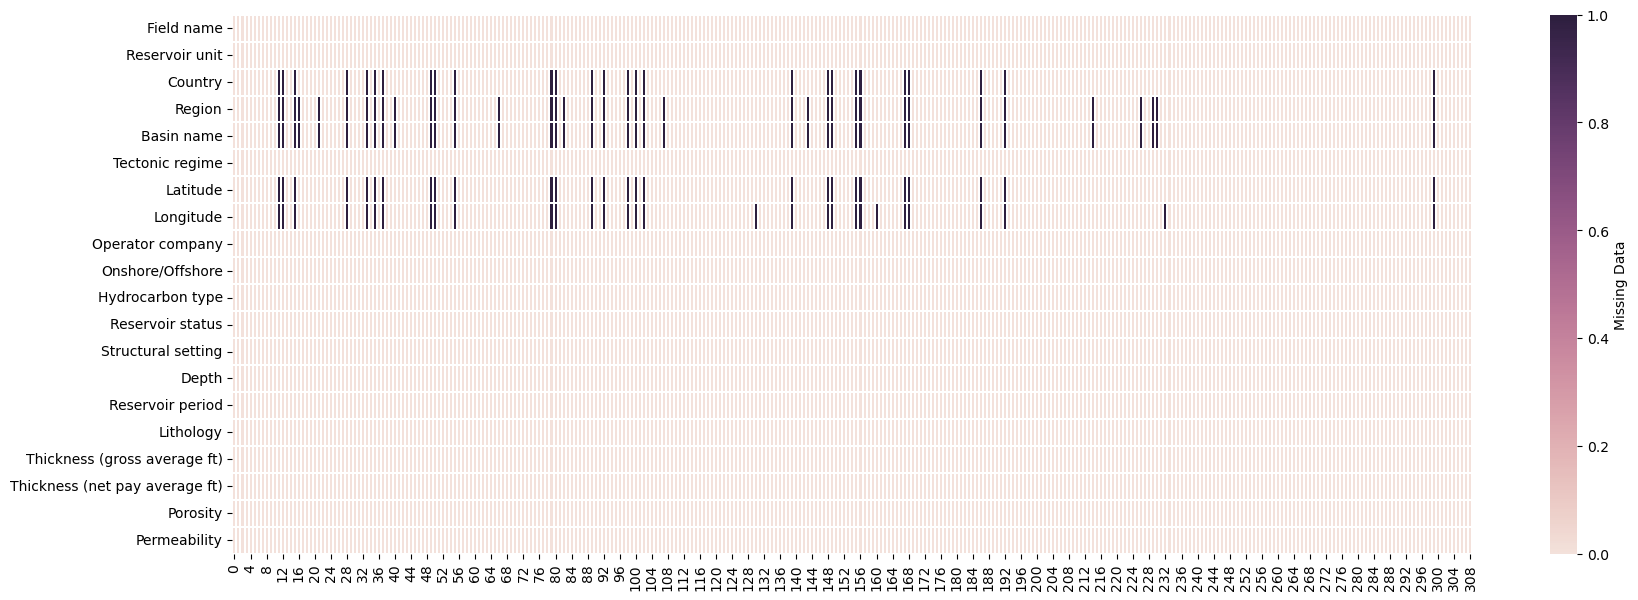

In [20]:
plt.figure(figsize=(20,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(data_train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [22]:
data_cleaned = data_train.dropna() #нулевые признаки в нашем случае проще удалить
print(data_cleaned.isnull().sum())

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64


In [24]:
data_cleaned.shape

(268, 20)

Посмотрим на распределение данных по классам.

C:\Users\dfu\AppData\Local\Temp\ipykernel_18808\3781264608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')


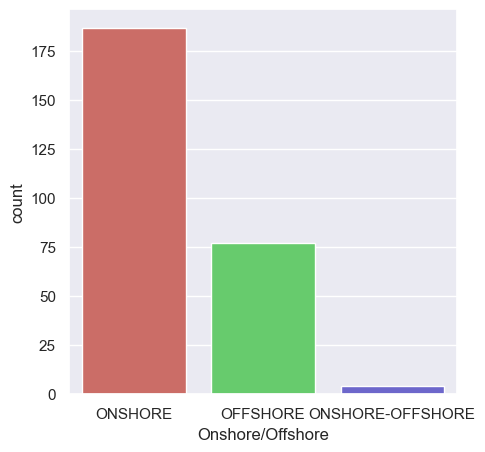

In [27]:
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(data_cleaned['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

Исходя из соотношения классов, ясно, что модель будет хуже определять класс OFFSHORE и ONSHORE-OFFSHORE.

In [30]:
#Удалим большинство категориальных признаков, чтобы сохранить информативность и не слишком сильно повысить вычислительную сложность модели

data = data_cleaned.drop(columns = ['Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country',                          
                                    'Region', 'Basin name', 'Operator company'])
data.head()

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,ONSHORE,OIL,DECLINING PRODUCTION,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,ONSHORE,OIL,NEARLY DEPLETED,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,ONSHORE,OIL,REJUVENATING,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OFFSHORE,OIL,NEARLY DEPLETED,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,ONSHORE,OIL,UNKNOWN,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [32]:
from sklearn.preprocessing import OrdinalEncoder #закодируем оставшиеся категориальные признаки, включая целевую переменную

# Список категориальных столбцов, которые нужно закодировать
categ = ['Hydrocarbon type', 'Onshore/Offshore', 'Reservoir status', 'Reservoir period', 'Lithology']

# Создаем OrdinalEncoder, который заменит категории числами
# Если в тестовой выборке появятся неизвестные категории, они будут заменены на -1
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Обучаем encoder на тренировочных данных и сразу трансформируем train и test
train_encoded = encoder.fit_transform(data[categ])

# Заменяем старые категориальные столбцы новыми закодированными
data[categ] = train_encoded

data.head()

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,1.0,3.0,2.0,1870,1.0,7.0,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,1.0,3.0,6.0,4843,13.0,7.0,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,1.0,3.0,8.0,6050,8.0,5.0,250.0,184.0,21.0,410.0
3,61.3833,1.7500,0.0,3.0,6.0,8988,8.0,7.0,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,1.0,3.0,12.0,9306,5.0,3.0,233.0,167.0,11.8,1407.0


Посмотрим на то, как признаки коррелируют с целевой переменной.

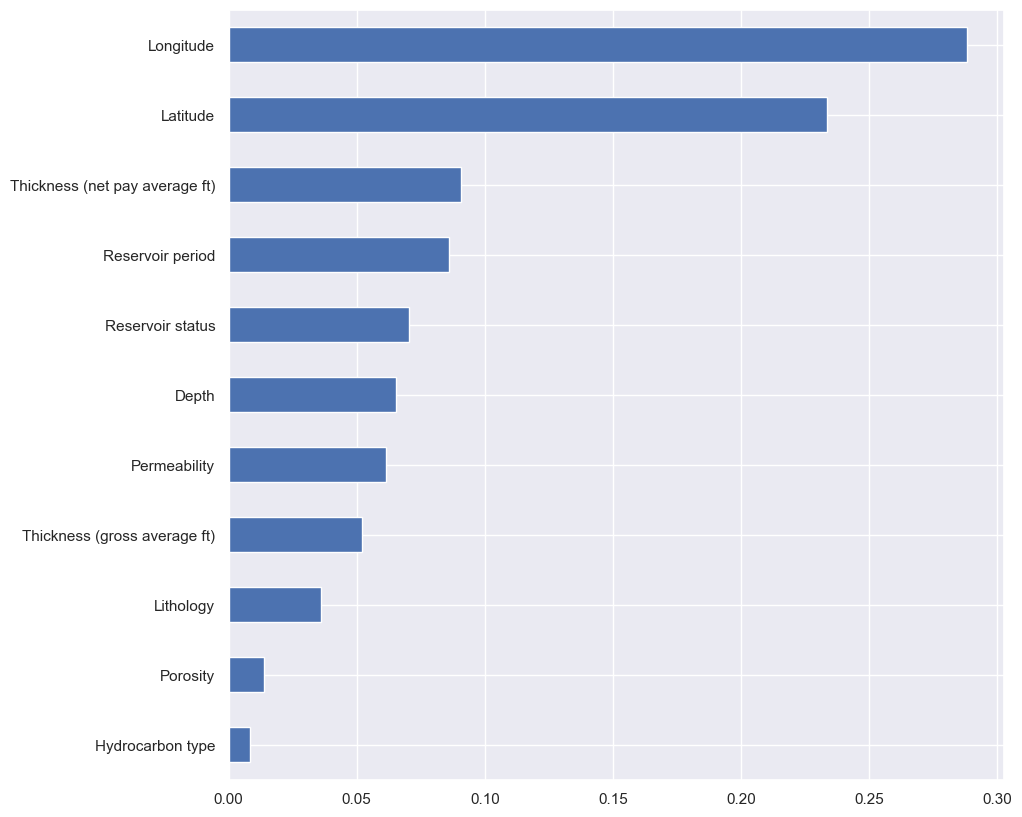

In [35]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop(columns=['Onshore/Offshore'])
y = data['Onshore/Offshore']

importances = mutual_info_classif(X, y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10,10))
feature_importances.plot(kind='barh')
plt.show()

In [37]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k=7)

X_selected = selector.fit_transform(X, y)

X_selected

array([[ 5.100000e+01,  4.480420e+01,  1.870000e+03, ...,  3.300000e+01,
         2.400000e+01,  3.000000e+01],
       [-1.960170e+01, -3.983320e+01,  4.843000e+03, ...,  7.200000e+01,
         2.300000e+01,  3.500000e+02],
       [ 2.608000e+01,  4.981000e+01,  6.050000e+03, ...,  1.840000e+02,
         2.100000e+01,  4.100000e+02],
       ...,
       [ 4.030000e+01, -1.102100e+02,  1.525000e+04, ...,  5.750000e+02,
         5.000000e+00,  1.000000e-01],
       [ 4.510390e+01, -1.050967e+02,  4.300000e+03, ...,  2.300000e+01,
         2.850000e+01,  2.250000e+03],
       [ 4.300600e+01, -1.051392e+02,  6.367000e+03, ...,  1.700000e+01,
         1.400000e+01,  4.300000e+00]])

Исходя из графика, можно сделать вывод, что признаки Lithology, Porosity и Thickness мало коррелируют с целевой переменной - лучше будет их убрать, чтобы избавиться от потенциального шума.

In [40]:
data = data.drop(columns = ['Lithology', 'Porosity', 'Thickness (gross average ft)'])
data.head()

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Thickness (net pay average ft),Permeability
0,51.0000,44.8042,1.0,3.0,2.0,1870,1.0,33.0,30.0
1,-19.6017,-39.8332,1.0,3.0,6.0,4843,13.0,72.0,350.0
2,26.0800,49.8100,1.0,3.0,8.0,6050,8.0,184.0,410.0
3,61.3833,1.7500,0.0,3.0,6.0,8988,8.0,300.0,750.0
4,53.2287,-115.8008,1.0,3.0,12.0,9306,5.0,167.0,1407.0


In [42]:
from sklearn.model_selection import train_test_split #делим данные на обучаюшую и тестовые подвыборки


X = data.drop(columns=['Onshore/Offshore'])
y = data['Onshore/Offshore']
# Разбиваем данные с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% данных в тест
    random_state=42,         # Фиксируем для воспроизводимости
    stratify=y               # Стратифицированное разбиение, сохраняет долевое соотношение классов
)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (214, 8), (214,)
Train dataset size: (54, 8), (54,)


In [68]:
from sklearn.linear_model import Perceptron #обучаем несколько моделей и смотрим на качество их метрик
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

percept = Perceptron()
percept.fit(X_train, y_train)
y_pred_percept = percept.predict(X_test)
print('Accuracy of perceptron on test set: {:.2f}'.format(percept.score(X_test, y_test)))

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

neighbours = KNeighborsClassifier()
neighbours.fit(X_train, y_train)
y_pred_neighbours = neighbours.predict(X_test)
print('Accuracy of K nearest neighbours algorithm on test set: {:.2f}'.format(neighbours.score(X_test, y_test)))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# обучение модели
tree.fit(X_train, y_train)
print(f'Tree f1_score: {f1_score(y_test, y_pred_tree, average = 'micro')}')

Accuracy of perceptron on test set: 0.28
Accuracy of logistic regression on test set: 0.67
Accuracy of K nearest neighbours algorithm on test set: 0.76
Tree f1_score: 0.8148148148148148


C:\Users\dfu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Самый лучший результат остается у алгоритма дерева - следовательно, для предсказания по тесту будем использовать именно его.

Проделываем все аналогичные шаги по предобработке и дата-инжинирингу над тестовыми данными.

In [98]:
test_data = pd.read_csv('oil_test_fixed.csv')

test_data.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [100]:
test_data.shape

(133, 19)

In [102]:
test_data = test_data.drop(columns = ['Lithology', 'Porosity', 'Thickness (gross average ft)', 'Tectonic regime', 'Structural setting', 'Field name', 
                                      'Reservoir unit', 'Country', 'Region', 'Basin name', 'Operator company'])

test_data.shape

(133, 8)

In [104]:
nulls_test = test_data.isnull().sum()
print(nulls_test)

Latitude                          1
Longitude                         1
Hydrocarbon type                  0
Reservoir status                  0
Depth                             0
Reservoir period                  0
Thickness (net pay average ft)    0
Permeability                      0
dtype: int64


In [106]:
from sklearn.preprocessing import OrdinalEncoder

# Список категориальных столбцов, которые нужно закодировать
categ1 = ['Hydrocarbon type', 'Reservoir status', 'Reservoir period']

# Создаем OrdinalEncoder, который заменит категории числами
# Если в тестовой выборке появятся неизвестные категории, они будут заменены на -1
encoder1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Обучаем encoder на тренировочных данных и сразу трансформируем train и test
test_encoded = encoder1.fit_transform(test_data[categ1])

# Заменяем старые категориальные столбцы новыми закодированными
test_data[categ1] = test_encoded

test_data.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Thickness (net pay average ft),Permeability
0,29.7422,28.4925,2.0,3.0,10282,5.0,144.0,8.0
1,31.4382,31.3616,1.0,1.0,10499,9.0,410.0,300.0
2,48.4740,57.6667,4.0,2.0,6000,2.0,105.0,20.0
3,60.7833,1.7333,4.0,4.0,9790,8.0,344.0,500.0
4,21.6000,72.9167,4.0,3.0,2950,11.0,0.0,250.0


In [108]:
test_data = test_data.fillna(0)
test_data.isnull().sum()

Latitude                          0
Longitude                         0
Hydrocarbon type                  0
Reservoir status                  0
Depth                             0
Reservoir period                  0
Thickness (net pay average ft)    0
Permeability                      0
dtype: int64

In [110]:
test_data.shape

(133, 8)

In [112]:
y_test_pred = tree.predict(test_data) #обучаем модлеь на тестовой выборке и формируем файл для загрузки на Kaggle
ans_df = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

ans_df.reset_index(inplace=True)
ans_df.to_csv('submition.csv', index=False)